### Exercise 1.1


Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.
<hr style="border-top: 1px solid #001a79;" />

A Google search for:<br>
<br>
"Combinations in Python",
<br>"Fisher's exact test python" <br>
"Lady tasting tea python"
<br>

gives plenty of results to look at.
The useful ones have been documented under [References](#references).

The following is adapted from https://stackoverflow.com/a/4941932

In [2]:
# Math module
import math

math.comb(n, k) is used to select k items from n items without repetition and without order, according to the official documentation<sub>1</sub>.
<br>

Firstly, Let's consider Fisher's experiment with 4 cups from 8:

### Experiment using 4 cups from 8:
<hr style="border-top: 1px solid #000000;" />

In [3]:
# Number of ways of selecting 4 cups from 8
math.comb(8,4)

70

In [21]:
# Probability of randomly selecting correct 4 cups is:
1.0/math.comb(8,4)

0.014285714285714285

Which is approximately 1.43%. 

### Experiment using 5 cups from 10:
<hr style="border-top: 1px solid #000000;" />

In [4]:
# Number of ways of selecting 5 cups from 10.
math.comb(10, 5)

252

In [29]:
# Probability of randomly selecting correct 5 cups is:
1.0/math.comb(10, 5)

0.003968253968253968

Which is approximately 0.4%

So, if the experiment was done with 10 cups total, five with milk in first and five with tea in first, then the chance of sleecting correctly randomly is much less than 1% 

### Experiment using 4 cups from 9:
<hr style="border-top: 1px solid #000000;" />

We could design the experiment to have 9 cups in total, 4 with milk in first and five with tea in first, or vice versa.

In [8]:
# Number of ways of selecting 4 cups from 9
math.comb(9,4)

126

In [9]:
# The probability is then:
1.0/math.comb(9,4)

0.007936507936507936

This is approximately 0.8%.

### Experiment using 5 cups from 9:
<hr style="border-top: 1px solid #000000;" />

In [11]:
# Note the number of ways of selecting 5 cups from 9:
math.comb(9, 5)

126

In [24]:
# The probability is then:
1.0/math.comb(9, 5)

0.007936507936507936

Also approximately 0.8%. This is because the number of ways doesn't change.

### Experiment using 6 cups from 12:
<hr style="border-top: 1px solid #000000;" />

In [26]:
math.comb(12,6)

924

In [27]:
1.0/math.comb(12,6)

0.0010822510822510823

Which gives approximately 0.1%.

### Conclusion:
<hr style="border-top: 1px solid #000000;" />

As the number of cups increase, the probability of choosing the correct cups decrease. 
Therefore, the minimum cups of tea that gives a probability close to 1% is 9 cups.

### Bonus Question:
How many would be required if you were to let the taster 
get one cup wrong while maintaining the 1% threshold?
<hr style="border-top: 1px solid #000000;" />

    

If I understand correctly:
Probability = (num of desired outcomes)/(total num of possible outcomes)
So if one cup is wrong, that must be that 3 cups must be right.

For 3 cups out of 8:

In [98]:
# Probability of randomly selecting 3 correct cups is:
1.0/math.comb(8,3)

0.017857142857142856

Probability of randomly selecting 3 cups out of 9:

In [50]:
1.0/math.comb(9,3)

0.011904761904761904

For 3 cups out of 10:

In [52]:
1.0/math.comb(10,3)

0.008333333333333333

So 10 cups are needed to maintain the 1% threshold whilst getting one cup wrong.

### Sci Py:
Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.
<hr style="border-top: 1px solid #000000;" />

In [81]:
# First, import the scipy
import scipy.stats as ss
import pandas as np

In [16]:
ss.fisher_exact([[4, 0], [0, 4]])

(inf, 0.028571428571428536)

Below is just to show that we get the same probability if we multiply by 2.<br>
So what is the significance of the 2?

In [17]:
0.014285714285714285 * 2

0.02857142857142857

Playing around with sci py


In [168]:
table1 = ([4, 0],[0, 4])
table2 = ([3, 1], [1, 3])
table3 = ([2, 2],[2, 2])
table4 = ([1, 3],[3, 1])
table5 = ([0, 4],[4, 0])

In [169]:
p1 = ss.fisher_exact((table), alternative="two-sided")
p2 = ss.fisher_exact((table2), alternative="two-sided")
p3 = ss.fisher_exact((table3), alternative="two-sided")
p4 = ss.fisher_exact((table4), alternative="two-sided")
p5 = ss.fisher_exact((table5), alternative="two-sided")

Now we print the p-values for the tables:

In [171]:
print(f'p(5) is {p5}')
print(f'p(4) is {p4}')
print(f'p(3) is {p3}')
print(f'p(2) is {p2}')
print(f'p(1) is {p1}')

p(5) is (0.0, 0.028571428571428536)
p(4) is (0.1111111111111111, 0.48571428571428527)
p(3) is (1.0, 1.0)
p(2) is (9.0, 0.48571428571428527)
p(1) is (9.0, 0.48571428571428527)


### A 2x2 contingency table to help illustrate the experiment
In the sci py page, they use whales and sharks.<br>
This table will be milk and tea. The columns on the lef are what's poured first;<br>
the columns on the right are what's guessed first.

<style>
		table {
			border:1px solid #b3adad;
			border-collapse:collapse;
			padding:5px;
		}
		table th {
			border:1px solid #b3adad;
			padding:5px;
			background: #f0f0f0;
			color: #313030;
		}
		table td {
			border:1px solid #b3adad;
			text-align:center;
			padding:5px;
			background: #ffffff;
			color: #313030;
		}
	</style>

<table>
		<thead>
			<tr>
				<th>Poured First</th>
				<th>Guessed</th>
				<th>First</th>
				<th>Total</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>&nbsp;</td>
				<td>Milk&nbsp;</td>
				<td>Tea</td>
				<td>&nbsp;</td>
			</tr>
			<tr>
				<td>Milk&nbsp;</td>
				<td>4&nbsp;</td>
				<td>0&nbsp;</td>
				<td>4&nbsp;</td>
			</tr>
			<tr>
				<td>Tea&nbsp;</td>
				<td>0&nbsp;</td>
				<td>&nbsp;4</td>
				<td>4&nbsp;</td>
			</tr>
			<tr>
				<td>&nbsp;</td>
				<td>4&nbsp;</td>
				<td>4&nbsp;</td>
				<td>8&nbsp;</td>
			</tr>
		</tbody>
	</table>

In [172]:
oddsratio1, pvalue1 = ss.fisher_exact((table1), alternative="greater")
oddsratio2, pvalue2 = ss.fisher_exact((table2), alternative="greater")
oddsratio3, pvalue3 = ss.fisher_exact((table3), alternative="greater")
oddsratio4, pvalue4 = ss.fisher_exact((table4),alternative="greater")
oddsratio5, pvalue5 = ss.fisher_exact((table5), alternative="greater")

Which give the following output:

In [180]:
print(f'oddsratio1 = {oddsratio1}, pvalue5 = {pvalue5}')
print(f'oddsratio2 = {oddsratio2}, pvalue4 = {pvalue4}')
print(f'oddsratio3 = {oddsratio3}, pvalue3 = {pvalue3}')
print(f'oddsratio4 = {oddsratio4}, pvalue2 = {pvalue2}')
print(f'oddsratio5 = {oddsratio5}, pvalue1 = {pvalue1}')

oddsratio1 = inf, pvalue5 = 1.0
oddsratio2 = 9.0, pvalue4 = 0.9857142857142855
oddsratio3 = 1.0, pvalue3 = 0.7571428571428571
oddsratio4 = 0.1111111111111111, pvalue2 = 0.24285714285714263
oddsratio5 = 0.0, pvalue1 = 0.014285714285714268


Just a reminder of what table 2 is:

In [181]:
table1

([4, 0], [0, 4])

In [182]:
# And the associated probability
pvalue1

0.014285714285714268

And above we see that using table3 with sci py gives us the probability of selecting the correct 4 cups - which is what we started with at the top of the document

In [183]:
table5

([0, 4], [4, 0])

In [194]:
p = ss.fisher_exact((table5), alternative="greater")
p

(0.0, 1.0)

In [ ]:
# Use fisher exact again, but without the "greater"

### Conclusion:
If there's a probability of one, that means that it's a dead certainty and the ladies<br> 
all guessed correctly.

### Exercise 1.2:
Take the [t-test examples from the scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) and explain how it works using markdown cells and code comments.

### Brief explanation and requirements of t-test:

**What it is:**<br>
A test for the null hypothesis that 2 independent samples have<br>
identical average (expected values).
<br>

**Assumptions:**<br>
1. The t-test assumes identical variances - remember:<br>
variance = (standard deviation)<sup>2</sup>
2. The data to be tested has to be randomly selected


Import the libraries necessary for plots:

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

**Examples from the scipy website** - A more detailed explanation and alternatives

**Example 1:** Random number generation

In [57]:
# Import the scripts needed.
from scipy import stats

# Generate a random number using numpy
# np.random.default_rng() is the default numpy method
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x1F9D8A21580

An alternative to above is to import the Generator directly<br>
from numpy to generate the random number, shown below:

In [43]:
from numpy.random import Generator, PCG64
rng1 = Generator(PCG64())
rng1

Generator(PCG64) at 0x1F9D8A21900

**Example 2:** Test with sample with identical means

In [90]:
# Generate two random samples using the random number generator
# Note that the sample size, etc is the same for both

rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-0.7488653906207864, pvalue=0.4541147985563462)

Let's plot the two samples to see what they look like:

Text(0.5, 1.0, 'T-Test identical sample sizes')

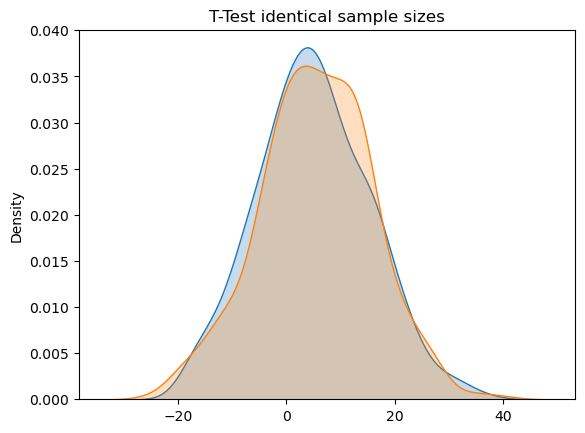

In [102]:
sns.kdeplot(rvs1, shade=True)
sns.kdeplot(rvs2, shade=True)
plt.title("T-Test identical sample sizes")

In [89]:
# Test where the variances aren't equal.
# In this case, Welch's t-test is used
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=1.0090113042053455, pvalue=0.3132138097856702)

An alternative way to get random data shown below:

In [91]:
# Import pandas
import pandas as pd

In [92]:
# where a and b are substitutes for rvs1 and rvs2
a = np.random.normal(loc=5, scale=10, size=500)
b = np.random.normal(loc=5, scale=10, size=500)
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})
df

,Category,Value
0,A,14.158324
1,A,14.368772
2,A,9.162005
3,A,13.364779
4,A,-3.807907
...,...,...
995,B,17.316585
996,B,6.462433
997,B,8.866579
998,B,23.772704


Let's also plot these random samples to see what they look like:

Text(0.5, 1.0, 'T-Test samples generated from numpy')

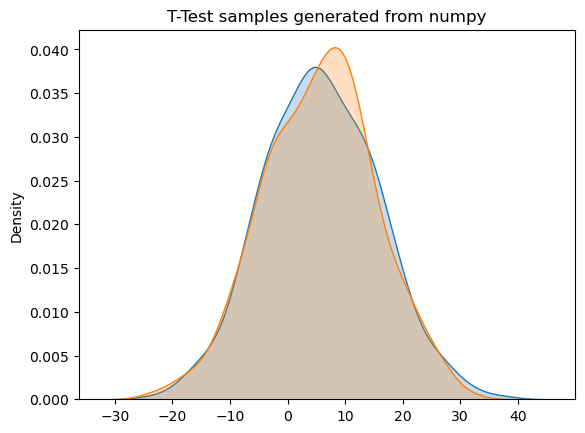

In [104]:
sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("T-Test samples generated from numpy")

In [103]:
# And then the t test can be performed on this data.
stats.ttest_ind(a, b)

Ttest_indResult(statistic=0.3720305727856188, pvalue=0.7099490654172844)

**Example 3:** Unequal variances: p is underestimated<br>
<br>
Here, we generate another random sample with the same sample size, but different scale<br>
so that the mean isn't the same as the first sample.

In [67]:
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=0.32176614706771367, pvalue=0.7476972427258763)

And we can visually compare the two samples (rvs1 and rvs3) below:

Text(0.5, 1.0, 'T-Test Samples with different means')

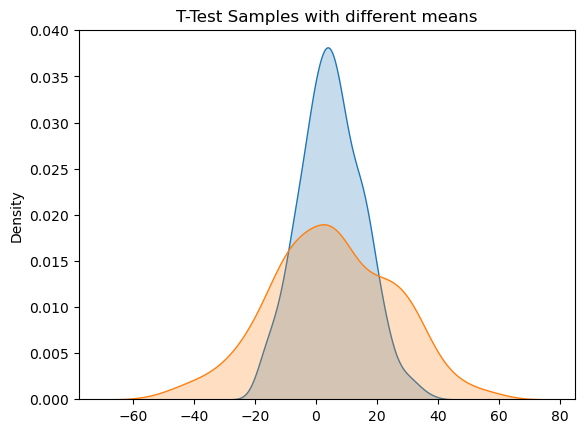

In [106]:
sns.kdeplot(rvs1, shade=True)
sns.kdeplot(rvs3, shade=True)
plt.title("T-Test Samples with different means")

Now set the equal variance flag to 'False' in the t-test:

In [68]:
stats.ttest_ind(rvs1, rvs3, equal_var=False)

Ttest_indResult(statistic=0.32176614706771367, pvalue=0.7477237296631132)

**Example 4:** Different sample sizes<br>
<br>
When n1 != n2, the equal variance t-statistic is <br>
no longer equal to the unequal variance t-statistic 

In [107]:
# Generate another sample
rvs4 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs4)

Ttest_indResult(statistic=0.4980589462504193, pvalue=0.6186256078219496)

Once again, set the equal variance flag to 'False':

In [78]:
stats.ttest_ind(rvs1, rvs4, equal_var=False)

Ttest_indResult(statistic=0.1758401303062732, pvalue=0.8607523243096241)

Let's compare the two samples:

Text(0.5, 1.0, 'T-Test Samples with different sample sizes')

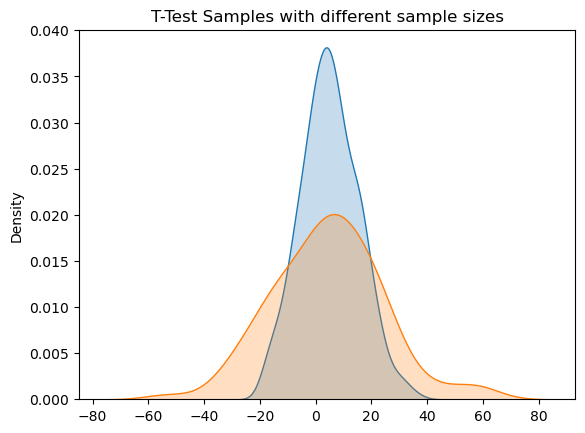

In [108]:
sns.kdeplot(rvs1, shade=True)
sns.kdeplot(rvs4, shade=True)
plt.title("T-Test Samples with different sample sizes")

**Example 5:** T-test with different means, variance and n<br>
<br>
Generate another sample with different mean, variance and n (sample size):

In [75]:
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs5)

Ttest_indResult(statistic=-0.3720146898161691, pvalue=0.7100137008671364)

Once again, set the equal variance flag to 'False':

In [79]:
stats.ttest_ind(rvs1, rvs5, equal_var=False)

Ttest_indResult(statistic=-0.22887302495933584, pvalue=0.8194052523825327)

Once again, a comparison of the first sample<br>
and the sample just generated (rvs5)

Text(0.5, 1.0, 'T-Test Samples with different mean, variance and n')

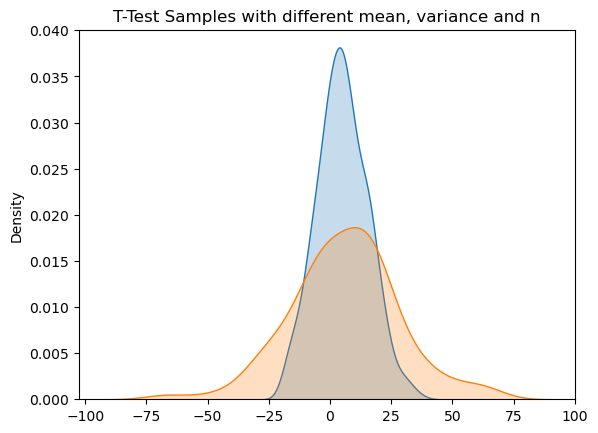

In [109]:
sns.kdeplot(rvs1, shade=True)
sns.kdeplot(rvs5, shade=True)
plt.title("T-Test Samples with different mean, variance and n")

**Example 6:** Permutation test<br>
<br>
When performing a permutation test, more permutations<br> 
typically yields more accurate results.<br>
Use a np.random.Generator to ensure reproducibility:

In [81]:
stats.ttest_ind(rvs1, rvs5, permutations=10000, random_state=rng)

Ttest_indResult(statistic=-0.3720146898161691, pvalue=0.7037)

**Example 6:** Samples with extreme tails<br>
<br>
Consider the two samples below, one of which has an extreme tail

In [113]:
a1 = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b1 = (1.1, 2.9, 4.2)

Use the trim keyword to perform a trimmed (Yuen) t-test.<br>
For example, using 20% trimming, trim=.2, the test will<br> 
reduce the impact of one element from each tail of sample a using (np.floor(trim*len(a)).
<br>
It won't have any effect on sample b because np.floor(trim*len(b)) is 0.
<br>
Let's confirm this below:

In [114]:
# Set trim to 0.2 for 20% trimming:
trim=.2

# Trim both samples
a_trimmed = np.floor(trim*len(a1))
b_trimmed = np.floor(trim*len(b1))

# Print the output
print(f'a_trimmed: {a_trimmed} \nb_trimmed: {b_trimmed}')

a_trimmed: 1.0 
b_trimmed: 0.0


We can specify the trim value directly in the t-test, shown below:

In [115]:
stats.ttest_ind(a1, b1, trim=.2)

Ttest_indResult(statistic=3.4463884028073513, pvalue=0.01369338726499547)

We can compare the two samples below - Displaying them on the same plot<br>
doesn't show us much, whereas seperately, we see more.

Text(0.5, 1.0, 'Sample with long tail')

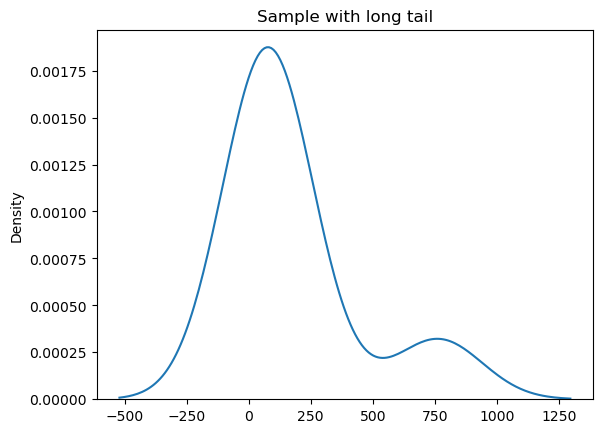

In [140]:
sns.kdeplot(a1)
#sns.kdeplot(b1, shade=True)
plt.title("Sample with long tail")

As can be seen from above, including the long tail results in misrepresentation<br>
of data.

Text(0.5, 1.0, 'Uniform sample')

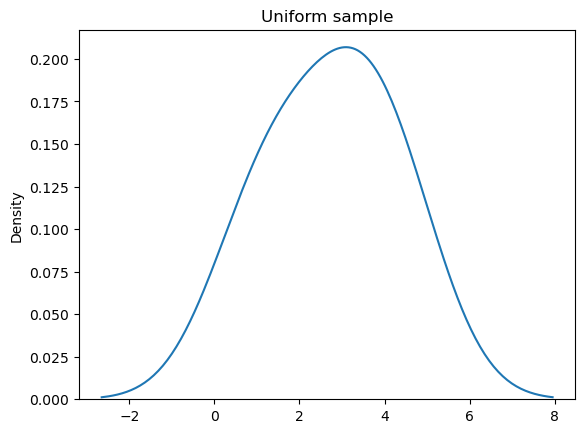

In [139]:
#sns.kdeplot(a1, shade=True)
sns.kdeplot(b1)
plt.title("Uniform sample")

We can see that from the sample with the long tail, i

<a id="references"></a>

<h3 style="font-weight:200">References:</h3>
<br>

1. [Ian's notebook](https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/01-statistics.ipynb) - This notebook is based on this
2. [The Python math module](https://docs.python.org/3/library/math.html) - Lists all the built-in methods of the Python math module with a brief explanation.
3. [The Python math.comb() method](https://www.w3schools.com/python/ref_math_comb.asp) - Simple explanation of the math.comb() method
4. [Official scipy documentation for t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) - Exercise 1.2 expands on this.
5. [Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test) - Welch's t-test.                                                        